<a href="https://colab.research.google.com/github/ludutram/LucianaDutra/blob/master/Policy_Evaluation___FrozenLake_Livro_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import gym

Criar o ambiente

In [5]:
#Cria o ambiente
env = gym.make('FrozenLake-v1')
env = env.unwrapped
nA = env.action_space.n
nS = env.observation_space.n
V = np.zeros(nS)
policy = np.zeros(nS)

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Ciclo principal que faz uma etapa de avaliação de políticas e uma tapa de melhoria de políticas. Este ciclo termina quando a política fica estável.

In [ ]:
policy_stable = False
it = 0
while not policy_stable:
    policy_evaluation(V, policy)
    policy_stable = policy_improvement(V, policy)
    it += 1


In [ ]:
#No final imprime o número de iterações completas, o valor da função, a política e  pontuação alcançada
print('Converged after %i policy iterations '%(it)) 
run_episodes(env, V, policy)
print(V.reshape((4,4)))
print(policy.reshape((4,4)))


In [ ]:
#antes de definir a policy_evaluation, podemos criar uma função para avaliar o 
#valor da ação esperado que será aproveitado no policy_improvement
def eval_state_action(V, s, a, gamma=0.99):
  return  np.sum([p * (rew + gamma*V[next_s]) for p, next_s, rew, _ in env.P[s][a]])

# P é um dicionário que contém todas as informaçãoes sobre a dinâmica do ambiente
# gamma é um fator de desconto, sendo 0,99 um valor padrão, quanto maior , mais difícil é para o agente prever
# o valor de estado, porque ele deve olhar mais para o futuro

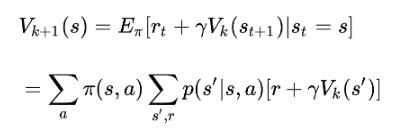

In [7]:
#Definir policy_evaluation que calcula a fórmula sob a política atual para cada estado até a
#atingir valores estáveis. Como a política é determinística, avaliamos apenas uma ação:
#função de valor estável sempre que o delta for menor que o o limite, eps
#quando essas condições são atendidas, a instrução de loop while é interrompida policy_improvement
#pega a função de valor e a política e os itera. 

def policy_evaluation(V, policy, eps=0.0001):
    
    while True:
        delta = 0
        # iteração para todos os estados
        for s in range(nS):
            old_v = V[s]
            # atualiza V[s] usando a equação de Bellman
            V[s] = eval_state_action(V, s, policy[s])
            delta = max(delta, np.abs(old_v - V[s]))
       #a função valor é estável quando delta é menor que limite de eps = 0.0001 
        if delta < eps:
            break

#Policy improvement. Atualiza a política baseada no valor da função
def policy_improvement(V, policy):   
    
    policy_stable = True
    for s in range(nS):
        old_a = policy[s]   # atualiza a política com a ação que traz o maior valor de estado
        policy[s] = np.argmax([eval_state_action(V, s, a) for a in range(nA)])
        if old_a != policy[s]: 
            policy_stable = False
    return policy_stable


#Roda muitos epsódios para testar a política
def run_episodes(env, policy, num_games=100):  
    tot_rew = 0
    state = env.reset()

    for _ in range(num_games):
        done = False
        while not done: 
            # seleciona uma ação de acordo com a política
            next_state, reward, done, _ = env.step(policy[state])
                
            state = next_state
            tot_rew += reward 
            if done:
                state = env.reset()

    print('Won %i of %i games!'%(tot_rew, num_games))


  